## 02. 결정 트리

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붗꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train,X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                  test_size=0.2, random_state=11)
#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names,
               feature_names=iris_data.feature_names,impurity=True, filled=True)

In [10]:
import graphviz

#위에서 생성된 tree.dot파일을 Graphviz가 읽어서 주피터 노트북에 시각화
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

Format: "svg" not recognized. Use one of:


CalledProcessError: Command '['dot', '-Tsvg']' returned non-zero exit status 1. [stderr: b'Format: "svg" not recognized. Use one of:\r\n']

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


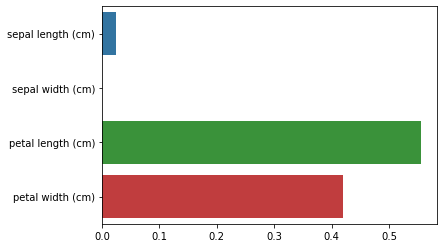

In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))
    
#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정 트리 과적합

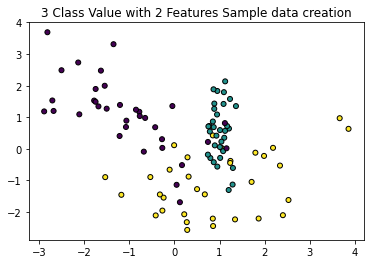

In [13]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class Value with 2 Features Sample data creation')

#2차원 시각화를 위해서 피처는 2개,클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,
                                          n_classes=3, n_clusters_per_class=1,random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels, s=25, edgecolor='k')

In [17]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
# visualize_boundary(dt_clf,X_features,y_labels)

### 결정트리 실습 - 사용자 행동 인식 데이터 세트

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음, 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('C:/Users/손은주/TAVE/UCI HAR Dataset/features.txt',sep='\s+',
                             header=None, names=['column_index','column_name'])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출: ',feature_name[:10])



전체 피처명에서 10개만 추출:  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [3]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [5]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                             if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [15]:
import pandas as pd

def get_human_dataset():
    
    #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./UCI HAR Dataset/features.txt',sep='\s+',
                                 header=None, names = ['column_index','column_name'])
    
    #중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    #학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt',sep='\s+',names = feature_name)
    X_test = pd.read_csv('./UCI HAR Dataset/test/X_test.txt',sep='\s+',names = feature_name)
    
    #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    #로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train,X_test,y_train,y_test = get_human_dataset()


In [16]:
print('## 학습 피처 데이터 셋 info()')
print(X_train.info())

## 학습 피처 데이터 셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [17]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [19]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [22]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.7min finished


GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [23]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)

In [25]:
cv_result_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


## 03. 앙상블 학습

### 보팅 분류기

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier


In [1]:
##205p 

import pandas as pd

def get_human_dataset():
    
    #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                                 header=None,names=['column_index','column_name'])
    
    #중복된 피쳐명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    #Dataframe에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    #학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    
    #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    #로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

FileNotFoundError: [Errno 2] No such file or directory: './human_activity/features.txt'

## 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()를 이용해 학습테스ㅡㅌ용 DataFrame 변환
X_train,X_test,y_train,y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가


In [2]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth': [6,8,10,12],
    'min_samples_leaf': [8,12,18],
    'min_samples_split':[8,16,20]
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


NameError: name 'RandomForestClassifier' is not defined

In [3]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf = 8, min_samples_split=8, random_state=0)

rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))


NameError: name 'RandomForestClassifier' is not defined

In [ ]:
# 피처 중요도 막대그래프 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  # 그림을 바로 볼 수 있게

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()


## GBM(Gradient Boosting Machine)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함, 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간: {0:.1f} 초'.format(time.time()-start_time))


In [ ]:
## 하이퍼 파라미터 튜닝 ##
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1],
}
grid_cv = GridSearchCV(gb_clf, param_gridcv=params, cv=2, verbose=1)
grid_cv.fit(X_train,y_train)
print('최적의 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
## GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))